# Projeto Zyfra – Modelo de Previsão para Extração de Ouro

É hora de lidar com um problema real de ciência de dados do campo da mineração de ouro. Este projeto foi fornecido pela Zyfra (os materiais estão em inglês).

## Descrição da Tarefa

Prepare um protótipo de um modelo de aprendizado de máquina para o Zyfra. A empresa desenvolve soluções de eficiência para a indústria pesada.

O modelo deve prever a quantidade de ouro puro extraído do minério de ouro. Você tem os dados sobre a extração e a purificação.

## Descrição do Projeto

Os dados são indexados com a data e hora da aquisição (característica data). Os parâmetros que estão próximos uns dos outros em termos de tempo geralmente são semelhantes.

Alguns parâmetros não estão disponíveis porque foram medidos e/ou calculados muito mais tarde. Por isso, algumas das características presentes no conjunto de treinamento podem estar ausentes do conjunto de teste. O conjunto de teste também não contém objetivos.

O conjunto de dados de origem contém os conjuntos de treinamento e teste com todas as características.

Você tem os dados brutos, recebidos diretamente do cliente. Antes de construir o modelo, verifique a exatidão dos dados. Para isso, use nossas instruções.

---

## 1. PREPARAÇÃO DOS DADOS

# 1.1 Importação das bibliotecas

In [1]:
import pandas as pd
import numpy as np

# Configurando o Pandas a mostrar o máximo de colunas e linhas
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", None)

# Impedir avisos
import warnings
warnings.filterwarnings("ignore")

# Criação gráfica
import plotly.express as px
import seaborn as sns
from matplotlib import pyplot as plt

# Modelo
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# Metricas
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, make_scorer

# Pipeline
from sklearn.pipeline import Pipeline

# Column Transformer
from sklearn.compose import ColumnTransformer

# Pre processamento
from sklearn.preprocessing import StandardScaler

# Model Selection
from sklearn.model_selection import cross_val_score, GridSearchCV

In [2]:
# Carregue os arquivos de dados em diferentes DataFrames

# Local Path
local_gold_recov_full_path = "gold_recovery_full.csv"
local_gold_recov_test_path = "gold_recovery_test.csv"
local_gold_recov_train_path = "gold_recovery_train.csv"

# Cloud Path
gold_recov_full_path = "/datasets/gold_recovery_full.csv"
gold_recov_test_path = "/datasets/gold_recovery_test.csv"
gold_recov_train_path = "/datasets/gold_recovery_train.csv"

try:
    df_full = pd.read_csv(local_gold_recov_full_path, sep=",", parse_dates=True)
    df_test = pd.read_csv(local_gold_recov_test_path, sep=",", parse_dates=True)
    df_train = pd.read_csv(local_gold_recov_train_path, sep=",", parse_dates=True)

except FileNotFoundError:
    print(
        f"O arquivo CSV não foi encontrado em {local_gold_recov_full_path}. Tentando o caminho {gold_recov_full_path}..."
    )

    print(
        f"O arquivo CSV não foi encontrado em {local_gold_recov_test_path}. Tentando o caminho {gold_recov_test_path}..."
    )

    print(
        f"O arquivo CSV não foi encontrado em {local_gold_recov_train_path}. Tentando o caminho {gold_recov_train_path}..."
    )

    try:
        df_full = pd.read_csv(gold_recov_full_path, sep=",", parse_dates=True)
        df_test = pd.read_csv(gold_recov_test_path, sep=",", parse_dates=True)
        df_train = pd.read_csv(gold_recov_train_path, sep=",", parse_dates=True)

    except FileNotFoundError:
        print(
            f"O arquivo CSV não foi encontrado em {gold_recov_full_path}. Nenhum arquivo encontrado."
        )

        print(
            f"O arquivo CSV não foi encontrado em {gold_recov_test_path}. Nenhum arquivo encontrado."
        )

        print(
            f"O arquivo CSV não foi encontrado em {gold_recov_train_path}. Nenhum arquivo encontrado."
        )

In [3]:
# Checando o shape dos dataframes

df_full.shape, df_train.shape, df_test.shape

((22716, 87), (16860, 87), (5856, 53))

Podemos perceber de cara, que há uma diferença de colunas usadas entre o dataset de treino (87) e o dataset de teste (53).

In [4]:
# Checando se DataFrame foi importado
df_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

In [5]:
# Checando se DataFrame foi importado
df_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,1401.065165,-501.038738,12.400507,5.114758,476.618130,59.865919,41.060195,12.181597,16.532144,5.801935,16.515277,5.803657,1000.276604,-350.172597,1251.322675,-398.655289,1250.493702,-399.746728,1199.398691,-397.50

In [6]:
# Checando se DataFrame foi importado
df_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

## 1.2 Checando se a quantidade retirada foi calculada corretamente.

In [7]:
# Copiando o dataframe de treinamento
new_df = df_train.copy()

# Separando as colunas necessárias para análise
subset_columns = subset = [
    "rougher.output.recovery",
    "rougher.output.concentrate_au",
    "rougher.input.feed_au",
    "rougher.output.tail_au",
]

# Crie um novo DataFrame com o subset das colunas necessárias
df_train_recovery_calc_subset = new_df[subset_columns]
df_train_recovery_calc_subset.head()

,rougher.output.recovery,rougher.output.concentrate_au,rougher.input.feed_au,rougher.output.tail_au
0,87.107763,19.793808,6.486150,1.170244
1,86.843261,20.050975,6.478583,1.184827
2,86.842308,19.737170,6.362222,1.162562
3,87.226430,19.320810,6.118189,1.079755
4,86.688794,19.216101,5.663707,1.012642


In [8]:
df_train_recovery_calc_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   rougher.output.recovery        14287 non-null  float64
 1   rougher.output.concentrate_au  16778 non-null  float64
 2   rougher.input.feed_au          16777 non-null  float64
 3   rougher.output.tail_au         14611 non-null  float64
dtypes: float64(4)
memory usage: 527.0 KB


Temos dados faltantes, como podemos ver a abaixo.

In [9]:
df_train_recovery_calc_subset.isna().sum()

rougher.output.recovery          2573
rougher.output.concentrate_au      82
rougher.input.feed_au              83
rougher.output.tail_au           2249
dtype: int64

Vamos fazer o drop desses dados faltantes.

In [10]:
# Dropna
df_train_recovery_calc_subset = df_train_recovery_calc_subset.dropna()

# Checando se os dados foram apagados
df_train_recovery_calc_subset.isna().sum()

rougher.output.recovery          0
rougher.output.concentrate_au    0
rougher.input.feed_au            0
rougher.output.tail_au           0
dtype: int64

Com as linhas de dados faltantes apagados, podemos calcular o valor de recovery, de acordo com a fórmula abaixo:

In [11]:
# Função para calcular a recuperação de ouro
def calculate_recovery(df, C, F, T):
    """
    Função para calcular a recuperação de ouro.

    Para calcular rougher recovery, a função precisa dos seguintes imputs:
    - df = DataFrame onde a coluna está presente
    - C = proporção de ouro no concentrado logo após a flotação
    - F = a proporção de ouro alimentado no sistema antes da flotação
    - T = a proporção de ouro nos restos de minério bruto logo após a flotação

    Esta função retorna o percentual de recuperação do concentrado de ouro após a etapa de purificação.
    """

    recovery = (df[C] * (df[F] - df[T])) / (df[F] * (df[C] - df[T])) * 100

    return recovery

In [12]:
# calculando o valor de recovery
calculated_recovery = calculate_recovery(
    df_train_recovery_calc_subset,
    "rougher.output.concentrate_au",
    "rougher.input.feed_au",
    "rougher.output.tail_au",
)
# Mostrando o resultado das 10 primeiras amostras
calculated_recovery.head(10)

0    87.107763
1    86.843261
2    86.842308
3    87.226430
4    86.688794
5    88.156912
6    88.168065
7    87.668336
8    87.035862
9    87.650868
dtype: float64

Agora podemos calcular o Mean Absolute Error (MAE) entre o cálculo gravado em calculated_recovery e os valores da feature df_train_recovery_calc_subset['rougher.output.recovery']

In [13]:
# Calculo Mean Absolute Error
mae = mean_absolute_error(
    df_train_recovery_calc_subset["rougher.output.recovery"], calculated_recovery
)

print(f"A diferença entre os cálculos e o valores originais são de: {mae}")

A diferença entre os cálculos e o valores originais são de: 9.303415616264301e-15


O fato de o erro médio absoluto (MAE) entre nossos valores de recuperação calculados e os valores de recurso fornecidos, ser de 9.303415616264301e-15, ou seja, quase zero, sugere que nossos cálculos são quase idêntico aos valores de recurso fornecidos para rougher.output.recovery.

### 1.3 Analisando recursos que não estão disponíveis no conjunto de testes

In [14]:
# Olhando as colunas que não foram usadas no dataframe de teste
missed_columns = list(set(df_train.columns) - set(df_test.columns))

In [15]:
missed_columns

['rougher.output.recovery',
 'rougher.output.tail_pb',
 'rougher.output.tail_sol',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_pb',
 'final.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.tail_ag',
 'secondary_cleaner.output.tail_pb',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'secondary_cleaner.output.tail_au',
 'final.output.tail_sol',
 'final.output.concentrate_sol',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'primary_cleaner.output.concentrate_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'final.output.tail_pb',
 'final.output.recovery',
 'rougher.output.concentrate_au',
 'final.output.concentrate_pb',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'final.output.tail_ag',
 'rougher.calculation.au_pb_ratio',
 'secondary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail

Aparentemente, todos os recursos que não estão incluídos no conjunto de teste são do tipo "_output_" e "calculation"

In [16]:
# Tamanho das colunas faltantes
len(missed_columns)

34

São 34 colunas faltantes nop conjunto de teste.

In [17]:
df_full[missed_columns].dtypes

rougher.output.recovery                               float64
rougher.output.tail_pb                                float64
rougher.output.tail_sol                               float64
primary_cleaner.output.tail_sol                       float64
primary_cleaner.output.tail_pb                        float64
final.output.concentrate_au                           float64
primary_cleaner.output.concentrate_pb                 float64
primary_cleaner.output.tail_ag                        float64
secondary_cleaner.output.tail_pb                      float64
rougher.output.concentrate_ag                         float64
rougher.output.concentrate_pb                         float64
rougher.output.concentrate_sol                        float64
secondary_cleaner.output.tail_au                      float64
final.output.tail_sol                                 float64
final.output.concentrate_sol                          float64
rougher.output.tail_ag                                float64
rougher.

Podemos observar que todas as colunas faltantes são do tipo float

### 1.4 Preparação dos dados

#### 1.4.1 Checando dados faltosos

In [18]:
def get_missing_values_report(dataset_name: str, df: pd.DataFrame):
    """
    Esta função:
     1. Primeiro, usa um DataFrame como entrada.
     2. calcula as informações de valor ausentes e cria um relatório.
     3. imprime as informações e o relatório.
    """
    # Calcula o número de valores faltantes em todas as colunas do DataFrame
    number_missing_values = df.isna().sum()

    # Obtém o número total de registros/observações no DataFrame
    number_of_rows = df.shape[0]

    # Calcula a porcentagem de valores faltantes em todas as colunas do DataFrame
    percentage_of_missing_values = round(
        (number_missing_values / number_of_rows) * 100, 2
    )

    # Crie um novo DataFrame com número de valores ausentes e porcentagem de valores ausentes em todas as colunas
    df_missing_values = pd.concat(
        [number_missing_values, percentage_of_missing_values], axis=1
    )
    df_missing_values = df_missing_values.rename(
        columns={0: "No of Missing Values", 1: "Percentage of Missing Values"}
    )

    # Classifica o novo DataFrame de acordo com a porcentagem de valores ausentes em ordem decrescente
    df_missing_values = df_missing_values.sort_values(
        by="Percentage of Missing Values", ascending=False
    )

    # Imprime as estatísticas de valor faltantes
    print("----------------------------------------------------------")
    print(f"        {dataset_name} Missing Values Report")
    print("----------------------------------------------------------")
    print(f"Total number of rows: {number_of_rows}")
    print(f"Total number of columns: {df.shape[1]}")
    print()
    print("Informações sobre o número e porcentagem de valores ausentes no DataFrame")
    display(df_missing_values)

In [19]:
# Create a list of the DataFrames
list_of_df = [
    {"name": "Training Dataset", "data": df_train},
    {"name": "Test Dataset", "data": df_test},
    {"name": "Source Dataset", "data": df_full},
]
for item in list_of_df:
    get_missing_values_report(item["name"], item["data"])

----------------------------------------------------------
        Training Dataset Missing Values Report
----------------------------------------------------------
Total number of rows: 16860
Total number of columns: 87

Informações sobre o número e porcentagem de valores ausentes no DataFrame


,No of Missing Values,Percentage of Missing Values
rougher.output.recovery,2573,15.26
rougher.output.tail_ag,2250,13.35
rougher.output.tail_sol,2249,13.34
rougher.output.tail_au,2249,13.34
secondary_cleaner.output.tail_sol,1986,11.78
rougher.input.floatbank11_xanthate,1904,11.29
final.output.recovery,1521,9.02
primary_cleaner.input.sulfate,1307,7.75
primary_cleaner.input.depressant,1262,7.49
rougher.calculation.au_pb_ratio,1242,7.37


----------------------------------------------------------
        Test Dataset Missing Values Report
----------------------------------------------------------
Total number of rows: 5856
Total number of columns: 53

Informações sobre o número e porcentagem de valores ausentes no DataFrame


,No of Missing Values,Percentage of Missing Values
rougher.input.floatbank11_xanthate,353,6.03
primary_cleaner.input.sulfate,302,5.16
primary_cleaner.input.depressant,284,4.85
rougher.input.floatbank10_sulfate,257,4.39
primary_cleaner.input.xanthate,166,2.83
rougher.input.floatbank10_xanthate,123,2.10
rougher.input.feed_sol,67,1.14
rougher.input.floatbank11_sulfate,55,0.94
rougher.input.feed_rate,40,0.68
secondary_cleaner.state.floatbank3_a_air,34,0.58


----------------------------------------------------------
        Source Dataset Missing Values Report
----------------------------------------------------------
Total number of rows: 22716
Total number of columns: 87

Informações sobre o número e porcentagem de valores ausentes no DataFrame


,No of Missing Values,Percentage of Missing Values
rougher.output.recovery,3119,13.73
rougher.output.tail_ag,2737,12.05
rougher.output.tail_au,2736,12.04
rougher.output.tail_sol,2736,12.04
rougher.input.floatbank11_xanthate,2257,9.94
secondary_cleaner.output.tail_sol,2215,9.75
final.output.recovery,1963,8.64
rougher.calculation.au_pb_ratio,1627,7.16
primary_cleaner.input.sulfate,1609,7.08
primary_cleaner.input.depressant,1546,6.81


Podemos ver que em todos os datasets, temos dados faltantes. Apenas as colunas ["primary_cleaner.input.feed_size", "date"] que possuem todos os dados. 

- Como na descrição do projeto fala: 
  
      Os dados são indexados com a data e hora da aquisição (característica data). Os parâmetros que estão próximos uns dos outros em termos de tempo geralmente são semelhantes.

Logo, podemos preencher os dados ausentes com os valores próximos, porém, não pode ser feito para as variáveis objetivos.

Vamos corrigir as colunas que possuem dados faltantes!

In [20]:
# Função para preencher os valores ausentes no DataFrame

target_cols = ["rougher.output.recovery", "final.output.recovery"]


def forward_fill_missing_values(df: pd.DataFrame):
    for col in df:
        if col not in target_cols:
            df[col].fillna(method="ffill", axis=0, inplace=True)

In [21]:
# Preencher os valores faltantes
forward_fill_missing_values(df_train)
forward_fill_missing_values(df_test)
forward_fill_missing_values(df_full)

Como não foi preenchido os valores ausentes para as colunas objetivos, vamos eliminar as linhas dessas colunas que têm valores ausentes, para poder estimar os modelos de ML mais pra frente.

In [22]:
# Drop dos valores ausentes no df_train
df_train = df_train.dropna(subset=["final.output.recovery", "rougher.output.recovery"])

# Checando se ainda consta algum valor ausente no df_train
df_train[["final.output.recovery", "rougher.output.recovery"]].isna().sum()

final.output.recovery      0
rougher.output.recovery    0
dtype: int64

In [23]:
# Drop dos valores ausentes no df_full
df_full = df_full.dropna(subset=["final.output.recovery", "rougher.output.recovery"])

# Checando se ainda consta algum valor ausente no df_full
df_full[["final.output.recovery", "rougher.output.recovery"]].isna().sum()

final.output.recovery      0
rougher.output.recovery    0
dtype: int64

In [24]:
# Checando de novo os valores nulos
for item in list_of_df:
    item["data"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16860 non-null  float64
 2   final.output.concentrate_pb                         16860 non-null  float64
 3   final.output.concentrate_sol                        16860 non-null  float64
 4   final.output.concentrate_au                         16860 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16860 non-null  float64
 7   final.output.tail_pb                                16860 non-null  float64
 8   final.output.tail_sol                               16860 non-null  float64


#### 1.4.2 Checando duplicados

In [25]:
# Checando os dados duplicados no df_train
df_train.duplicated().sum()

0

In [26]:
# Checando os dados duplicados no df_test
df_test.duplicated().sum()

0

In [27]:
# Checando os dados duplicados no df_full
df_full.duplicated().sum()

0

Não existem dados duplicados em nenhum dos dataframes!

#### 1.4.3 Checandos os datatypes

Como pode ser visto anteriormente, a coluna "date" não está como datetime. Vamos alterar!

In [28]:
# Convertendo a coluna datepara datetime
df_train["date"] = pd.to_datetime(df_train["date"])

# Print info
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14149 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                14149 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         14149 non-null  float64       
 2   final.output.concentrate_pb                         14149 non-null  float64       
 3   final.output.concentrate_sol                        14149 non-null  float64       
 4   final.output.concentrate_au                         14149 non-null  float64       
 5   final.output.recovery                               14149 non-null  float64       
 6   final.output.tail_ag                                14149 non-null  float64       
 7   final.output.tail_pb                                14149 non-null  float64       
 8   final.outpu

In [29]:
# Convertendo a coluna datepara datetime
df_test["date"] = pd.to_datetime(df_test["date"])

# Print info
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   date                                        5856 non-null   datetime64[ns]
 1   primary_cleaner.input.sulfate               5856 non-null   float64       
 2   primary_cleaner.input.depressant            5856 non-null   float64       
 3   primary_cleaner.input.feed_size             5856 non-null   float64       
 4   primary_cleaner.input.xanthate              5856 non-null   float64       
 5   primary_cleaner.state.floatbank8_a_air      5856 non-null   float64       
 6   primary_cleaner.state.floatbank8_a_level    5856 non-null   float64       
 7   primary_cleaner.state.floatbank8_b_air      5856 non-null   float64       
 8   primary_cleaner.state.floatbank8_b_level    5856 non-null   float64       
 9   primary_

In [30]:
# Convertendo a coluna datepara datetime
df_full["date"] = pd.to_datetime(df_full["date"])

# Print info
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19439 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                19439 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         19439 non-null  float64       
 2   final.output.concentrate_pb                         19439 non-null  float64       
 3   final.output.concentrate_sol                        19439 non-null  float64       
 4   final.output.concentrate_au                         19439 non-null  float64       
 5   final.output.recovery                               19439 non-null  float64       
 6   final.output.tail_ag                                19439 non-null  float64       
 7   final.output.tail_pb                                19439 non-null  float64       
 8   final.outpu

Agora temos os dados limpos, os dados ausentes preenchidos e com os tipos corretos. Podemos prosseguir com as análises dos dados!

## 2. ANÁLISE DE DADOS

### 2.1 Analisando como a concentração de metais (Au, Ag, Pb) muda dependendo do estágio de purificação

Podemos ver que temos possíveis 4 valores de estágios: rougher, primary_cleaner, secondary_cleaner e final. Porém dos metais concentrados, no dataframe df_train, não apresenta a variável secondary_cleaner.

Dessa forma, analisaremos os 3 estágios: rougher, primary_cleaner e final, juntamente com os dados de input dos metais brutos.

In [31]:
# Definindo os estágios
stages = [
    "rougher.input.feed",
    "rougher.output.concentrate",
    "primary_cleaner.output.concentrate",
    "final.output.concentrate",
]

# Criação de dicionário para cada metal
metals = {"_au": "Ouro", "_ag": "Prata", "_pb": "Chumbo"}


# Criação subplots para visualizar a concentração de cada metal
def plot_metal_concentration(df: pd.DataFrame, df_name: str):
    """
    Essa função:

    1. Faz o subplot da quantidade de gráficos que precisaremos, i.e., quantidade de metais da lista.

    2. plota o grafico de kernek Density Estimate (KDE) para visualizar a distribuição das observações no dataset, ao longo do histograma, de cada um dos metrais da lista e de cada estágio de purificação.
    """

    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 14), sharey=False)
    fig.suptitle(
        f"Mudança na Concentração de Metal por Estágio de Purificação (Densidade) \n\nDataSet: {df_name}",
        fontsize=15,
        y=1,
    )

    for metal in metals.keys():
        for stage in stages:
            ax = list(metals.keys()).index(metal)
            sns.kdeplot(
                df[(stage + metal)], ax=axes[ax], shade="fill", label=(stage + metal)
            )
            axes[ax].legend()
            axes[ax].set_xlabel(
                "Concentração de " + metals[metal] + " (%)", fontsize=12, labelpad=10
            )
            axes[ax].xaxis.set_label_position("top")
            axes[ax].set_ylabel("Densidade", fontsize=12)

    plt.tight_layout()
    plt.show()

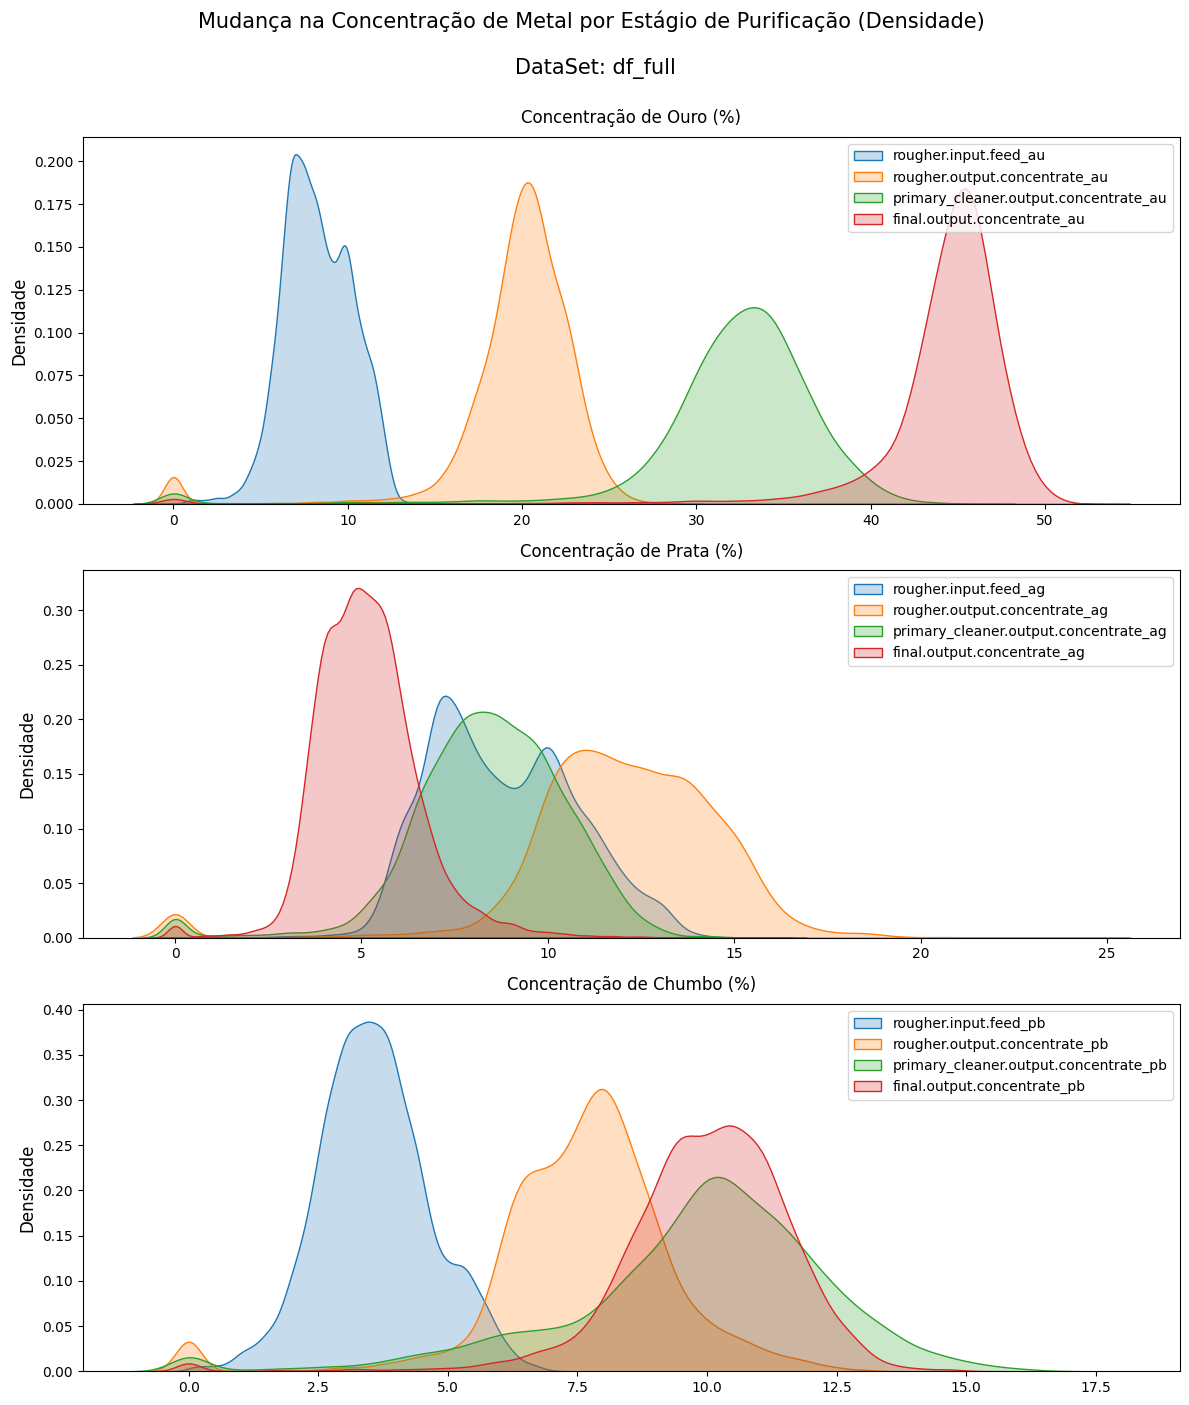

In [32]:
# Plotar a distribuição das concentrações de metais (Au, Ag, Pb) para cada estágio de purificação para df_full
plot_metal_concentration(df_full, "df_full")

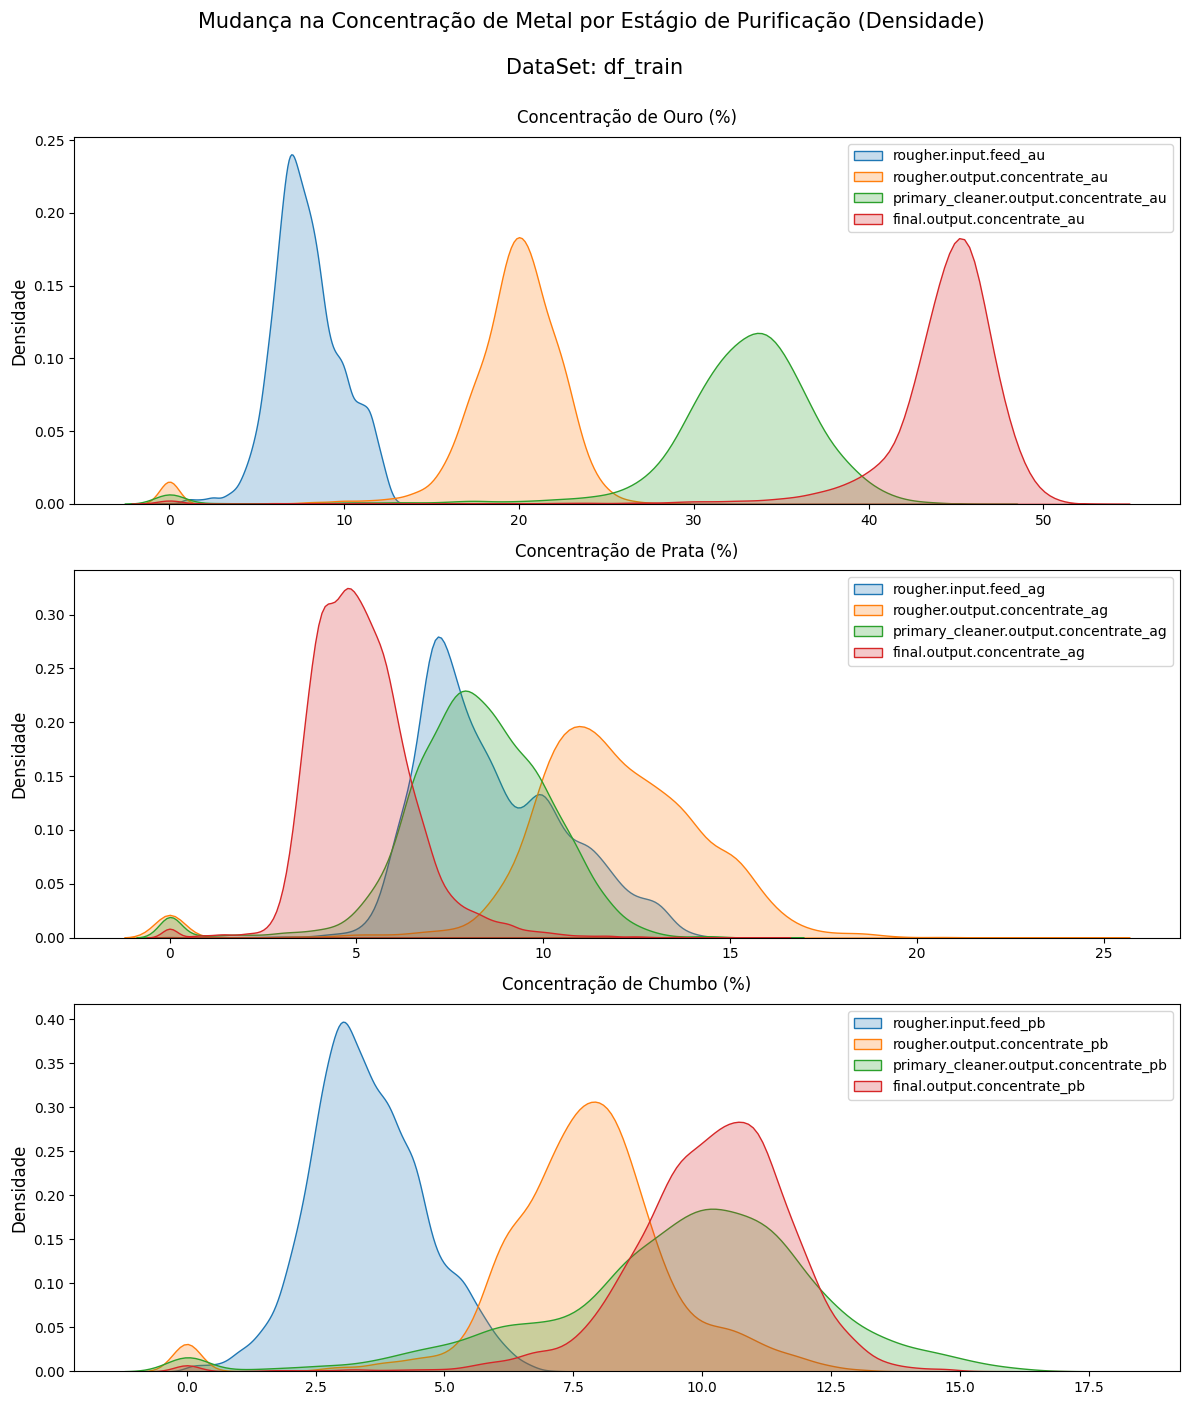

In [33]:
# Plotar a distribuição das concentrações de metais (Au, Ag, Pb) para cada estágio de purificação para df_train
plot_metal_concentration(df_train, "df_train")

Tanto no dataset df_full quanto no df_train, as observações são bem próximas, ou seja, a mudança na concentração de metal por estágio de purificação, são bem parecidas. Porém, olhando individualmente cada metal, há diferenças como:

- **Ouro**: A cada etapa do processo de purificação, a concentração de ouro aumenta.

- **Prata**: Após o processo de "feed", a concentração de prata aumenta, mas diminui a cada processo subsequente. O resultado final, "final.output.concentrate" é de uma concentração de prata inferior à concentração da mistura inicial do minério.

- **Chumbo**: Parece que a concentração de chumbo aumenta até a o segundo estágio do processo de limpeza, "rougher.output.concentrate", onde permanece aproximadamente igual à concentração final do processo de limpeza.

Podemos observar também, que há outliers nos dados. Pois, para cada etapa do processo, há casos em que a concentração de cada metal é 0.

#### 2.2 Comparando a distribuição do tamanho das partículas do minério no conjunto de treinamento e no conjunto de teste

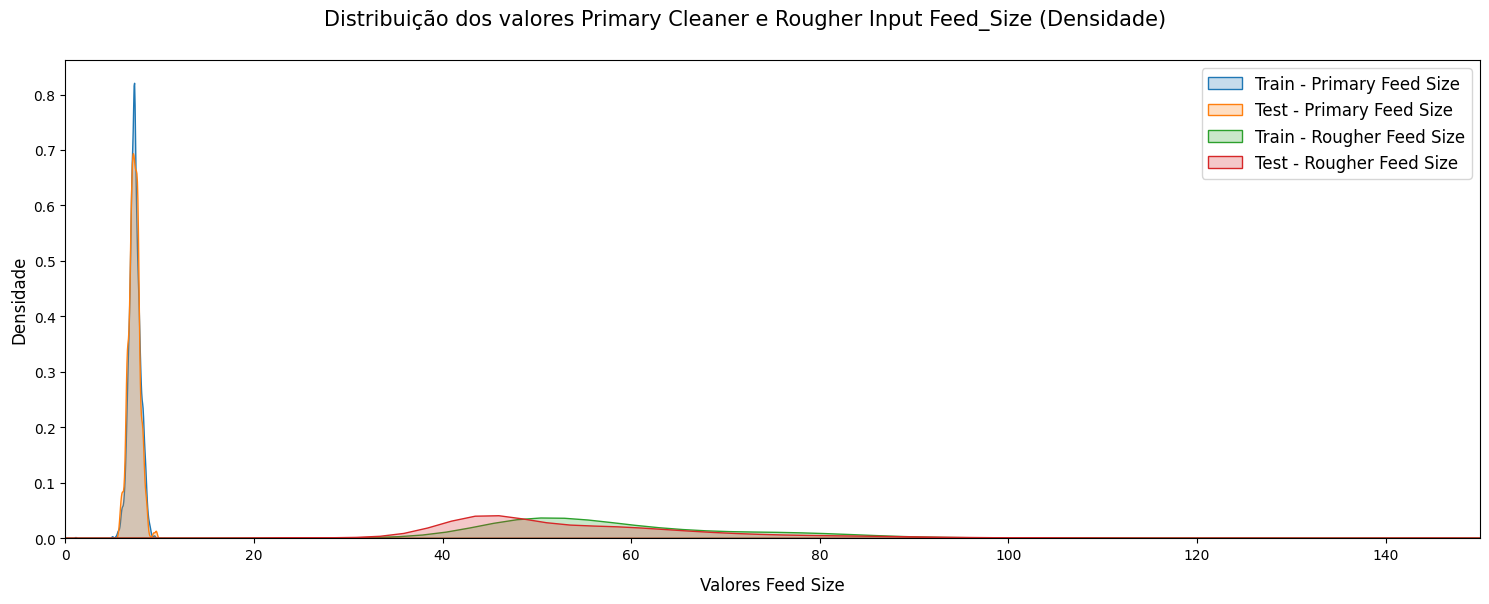

In [34]:
fig = plt.figure(figsize=(15, 6))
fig.suptitle(
    "Distribuição dos valores Primary Cleaner e Rougher Input Feed_Size (Densidade)",
    fontsize=15,
    y=1,
)

sns.kdeplot(
    df_train["primary_cleaner.input.feed_size"],
    fill=True,
    label="Train - Primary Feed Size",
)
sns.kdeplot(
    df_test["primary_cleaner.input.feed_size"],
    fill=True,
    label="Test - Primary Feed Size",
)
sns.kdeplot(
    df_train["rougher.input.feed_size"], fill=True, label="Train - Rougher Feed Size"
)
sns.kdeplot(
    df_test["rougher.input.feed_size"], fill=True, label="Test - Rougher Feed Size"
)
plt.legend(fontsize=12)
plt.xlabel("Valores Feed Size", fontsize=12, labelpad=10)
plt.ylabel("Densidade", fontsize=12)
plt.xlim(0, 150)
plt.tight_layout()
plt.show()

Como podemos ver no gráfico acima, as distribuições de valores para 'primary_cleaner.input.feed_size' e 'rougher.input.feed_size' são aproximadamente as mesmas para os conjuntos de dados de treinamento e teste

#### 2.3 Considerando as concentrações totais de todas as substâncias em diferentes estágios. Há anomalias em ambas amostras?

In [35]:
def calc_and_plot_total_concentrations(
    df: pd.DataFrame, stage: str, list_of_columns: list
):
    """
    Essa função faz:
    1. Calcula o total da concentração de todas as substâncias
    2. Plota o histograma
    3. Plota o boxplot para analisar os outliers
    """

    # Calculo do total de concentração das substâncias
    df[stage] = df[list_of_columns].sum(axis=1)

    # Set the plot styles
    sns.set(rc={"figure.figsize": (16.0, 8.0)})
    sns.set(font_scale=1.2)

    # Plot histograma
    sns.histplot(df[stage], bins=100, stat="frequency", kde=True)
    plt.title(
        f"Distribuição Total da Concentração de Todos os Metais no Estágio: {stage}"
    )
    plt.xlabel(stage)
    plt.show()

    # set the boxplot styles
    flierprops = dict(
        marker="o",
        markersize=10,
        markeredgecolor="black",
        markerfacecolor="darkgreen",
        alpha=0.6,
    )
    meanprops = dict(marker="s", markerfacecolor="white", markeredgecolor="black")

    # Plot boxplot
    box_plot = sns.boxplot(
        data=df[stage],
        showmeans=True,
        orient="h",
        linewidth=2,
        flierprops=flierprops,
        meanprops=meanprops,
        palette="muted",
    )

    box_plot.set(
        xlabel=stage,
        title=f"Distribuição Total da Concentração de Todos os Metais no Estágio: {stage}",
    )

    return df

In [36]:
# Criando lista de cada estágio de cada minério

feature_input = [
    "rougher.input.feed_au",
    "rougher.input.feed_ag",
    "rougher.input.feed_pb",
    "rougher.input.feed_sol",
]

feature_output = [
    "rougher.output.concentrate_au",
    "rougher.output.concentrate_ag",
    "rougher.output.concentrate_pb",
    "rougher.output.concentrate_sol",
]

feature_final = [
    "final.output.concentrate_au",
    "final.output.concentrate_ag",
    "final.output.concentrate_pb",
    "final.output.concentrate_sol",
]

##### 2.3.1 Full Dataset

- **ROUGHER INPUT FEED STAGE**

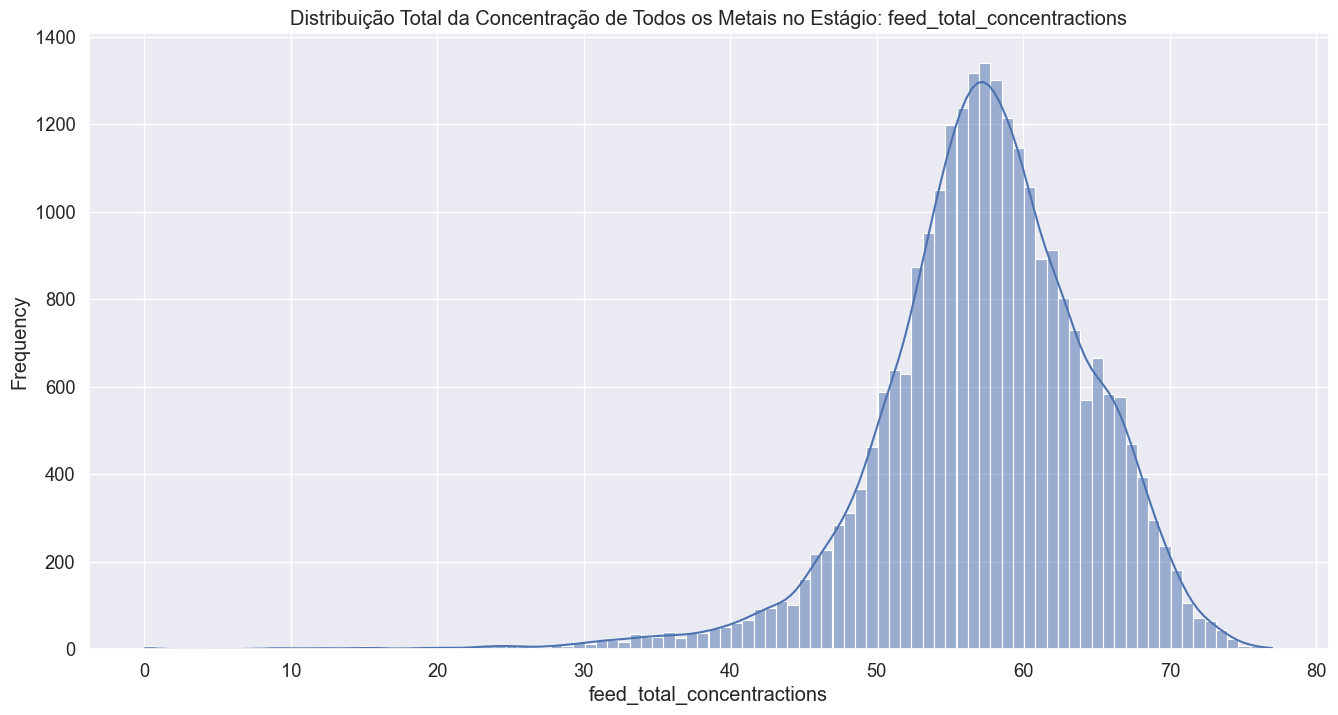

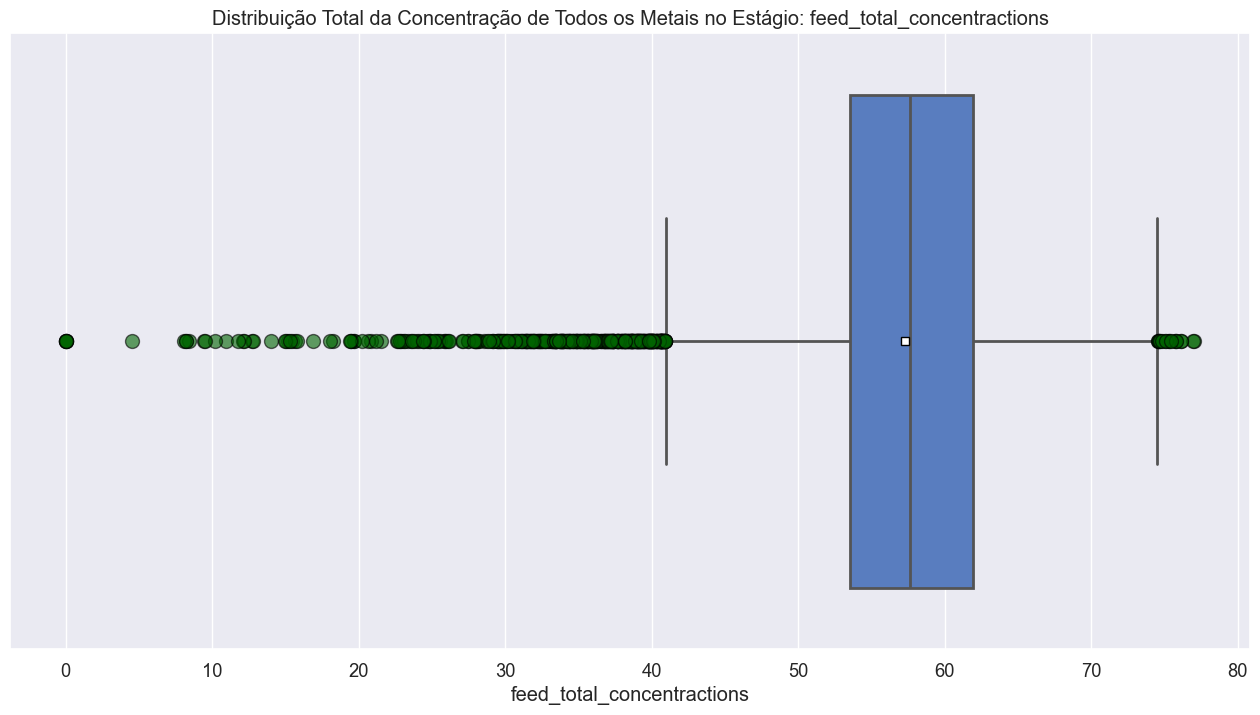

In [37]:
df_full = calc_and_plot_total_concentrations(
    df_full, "feed_total_concentractions", feature_input
)

- **ROUGHER OUTPUT STAGE**

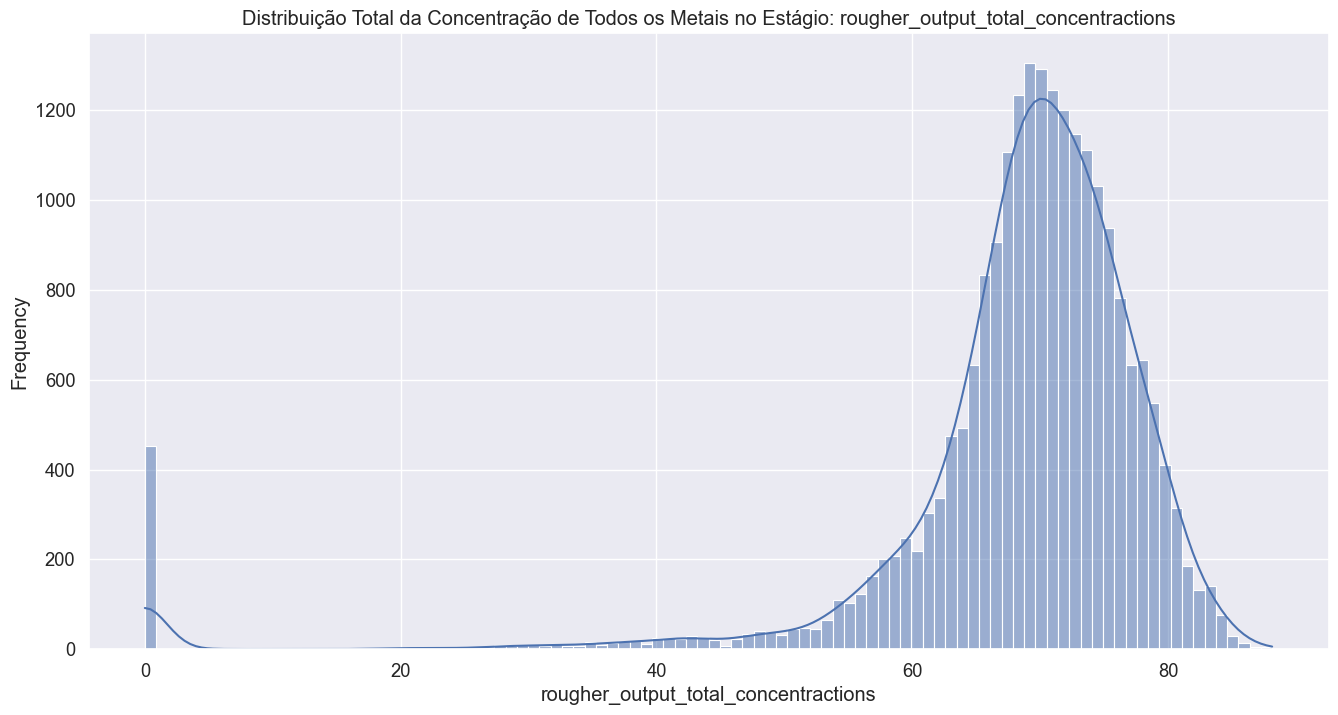

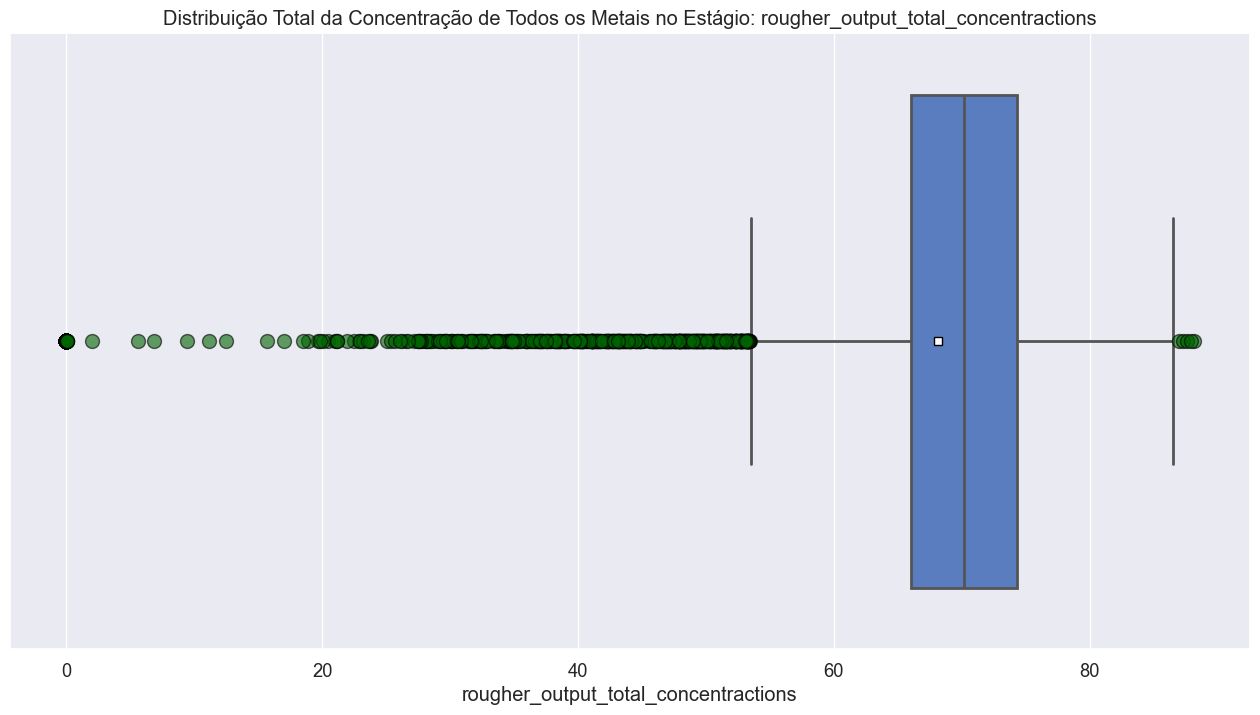

In [38]:
df_full = calc_and_plot_total_concentrations(
    df_full, "rougher_output_total_concentractions", feature_output
)

- **FINAL OUTPUT STAGE**

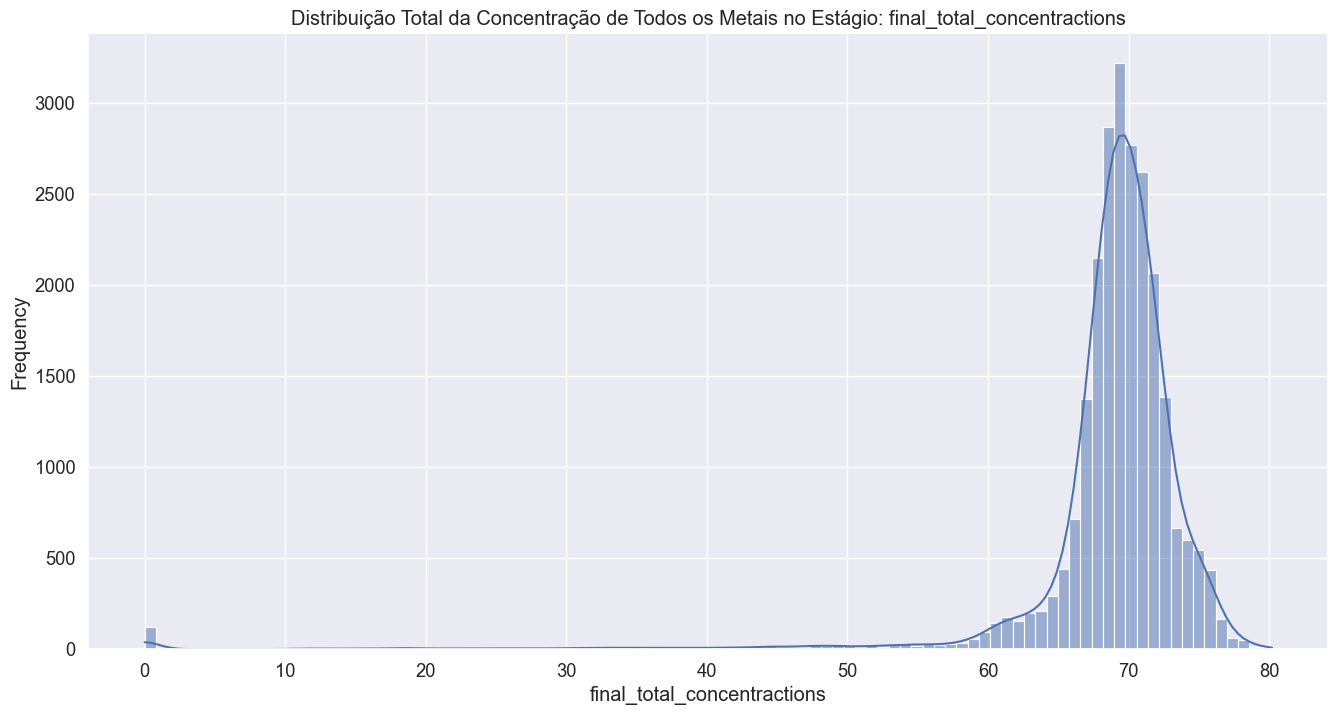

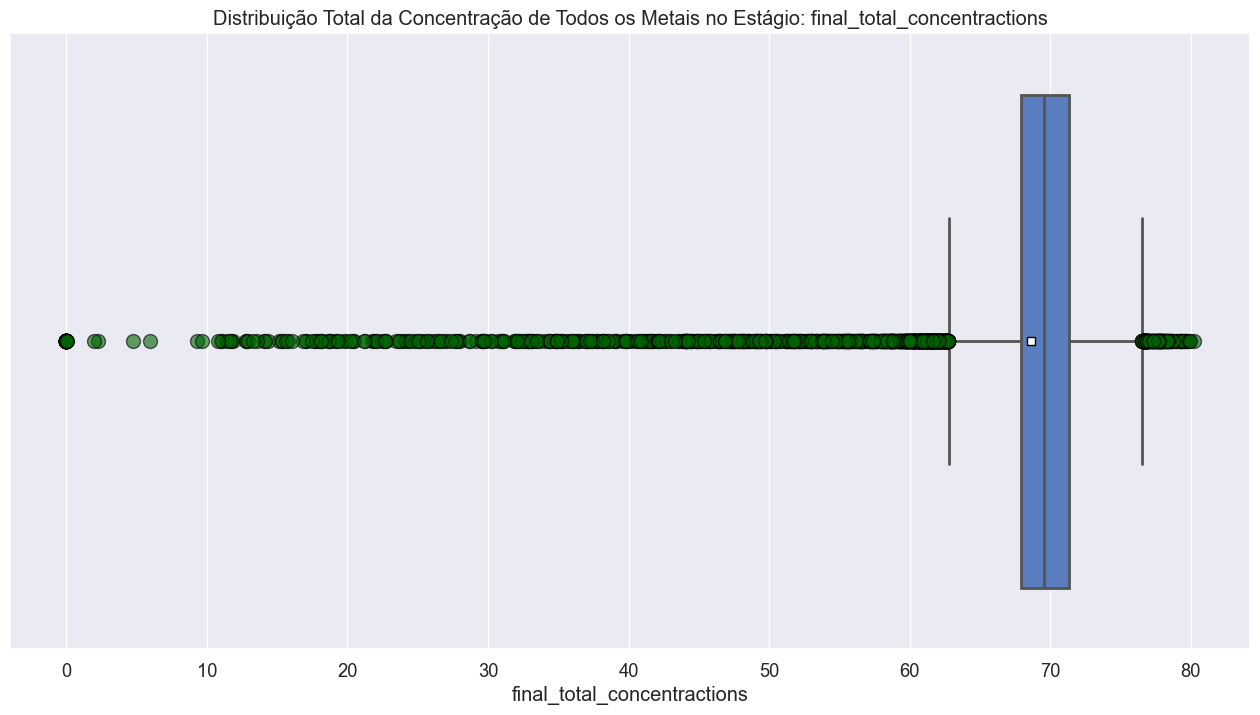

In [39]:
df_full = calc_and_plot_total_concentrations(
    df_full, "final_total_concentractions", feature_final
)

#### Conclusão

**ROUGHER INPUT FEED STAGE**

- As concentrações totais de todas as substâncias no conjunto de origem são inclinadas à esquerda, pois o pico da distribuição está no lado direito e a média é menor que a mediana.

- Existem muitos valores discrepantes, mas há um grande aumento incomum na concentração de todas as substâncias em 0.

- Removeremos todas as observações no conjunto de origem - df_full onde df_full['feed_total_concentractions'] < 0,8


**ROUGHER OUTPUT STAGE**

- As concentrações totais de todas as substâncias no conjunto de origem são inclinadas à esquerda, pois o pico da distribuição está no lado direito e a média é menor que a mediana.

- Existem muitos valores discrepantes, mas há um grande aumento incomum na concentração de todas as substâncias em 0.

- Removeremos todas as observações no conjunto de origem - df_full onde df_full['rougher_output_total_concentractions'] < 0,8


**FINAL OUTPUT STAGE**

- As concentrações totais de todas as substâncias no conjunto de origem são inclinadas à esquerda, pois o pico da distribuição está no lado direito e a média é menor que a mediana.

- Existem muitos valores discrepantes, mas há um grande aumento incomum na concentração de todas as substâncias em 0.

- Removeremos todas as observações no conjunto de origem - df_full onde df_full['final_total_concentractions'] < 0,8

##### 2.3.2 Train Dataset

- **ROUGHER INPUT FEED STAGE**

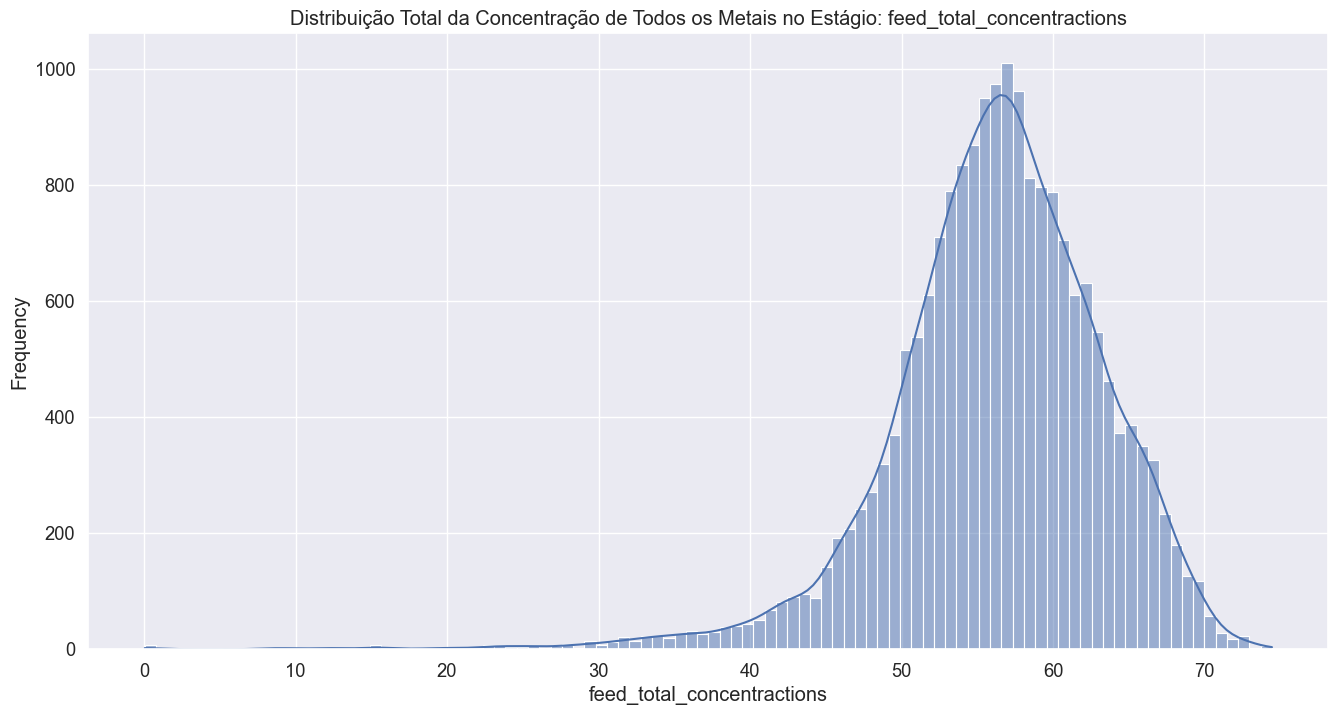

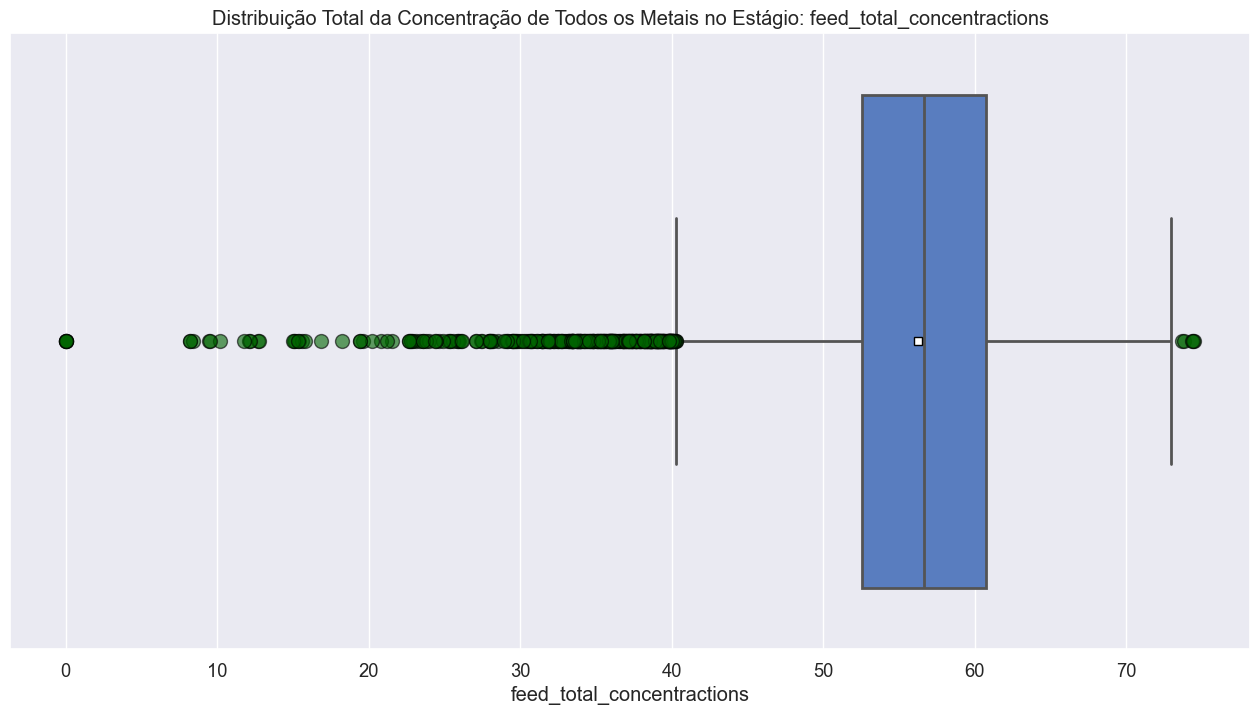

In [40]:
df_train = calc_and_plot_total_concentrations(
    df_train, "feed_total_concentractions", feature_input
)

- **ROUGHER OUTPUT STAGE**

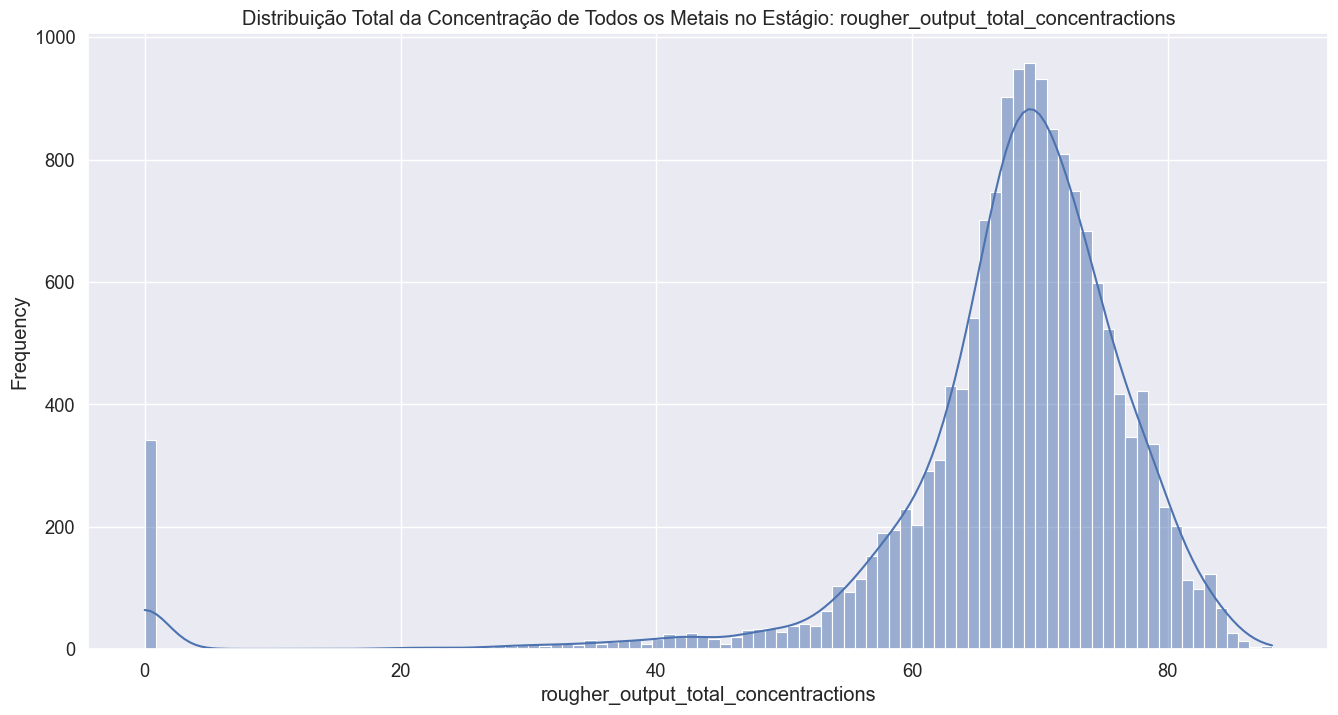

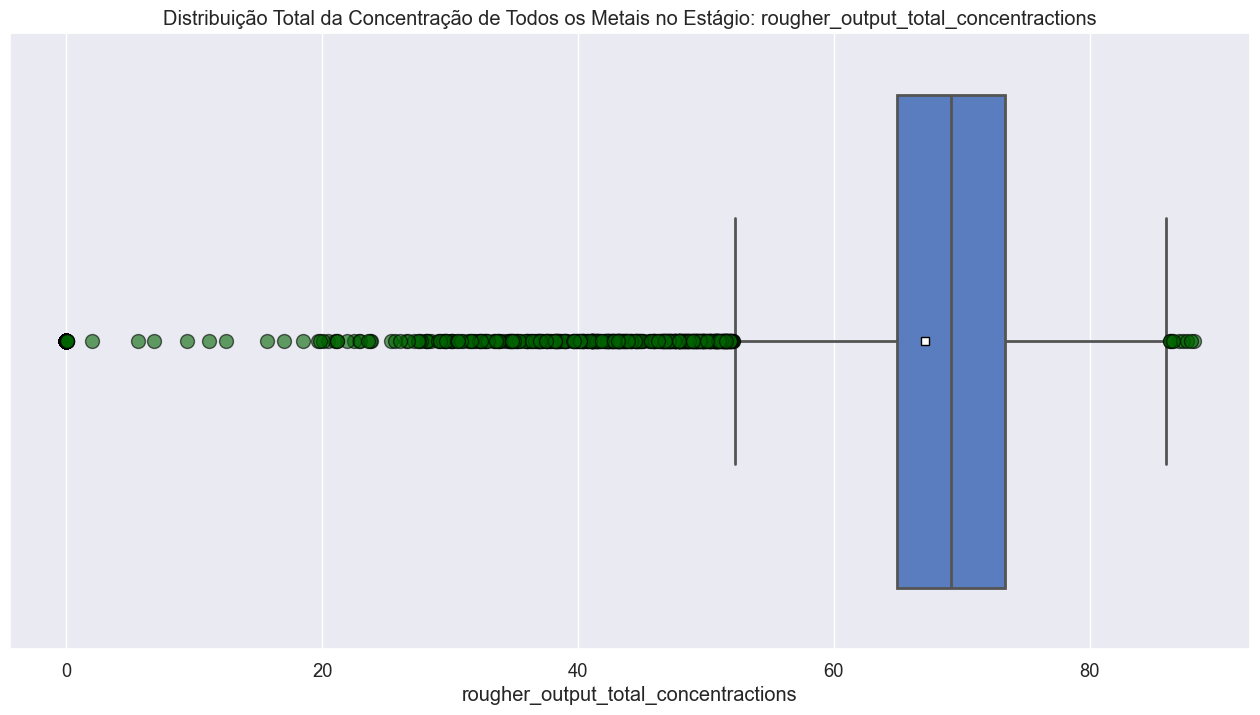

In [41]:
df_train = calc_and_plot_total_concentrations(
    df_train, "rougher_output_total_concentractions", feature_output
)

- **FINAL OUTPUT STAGE**

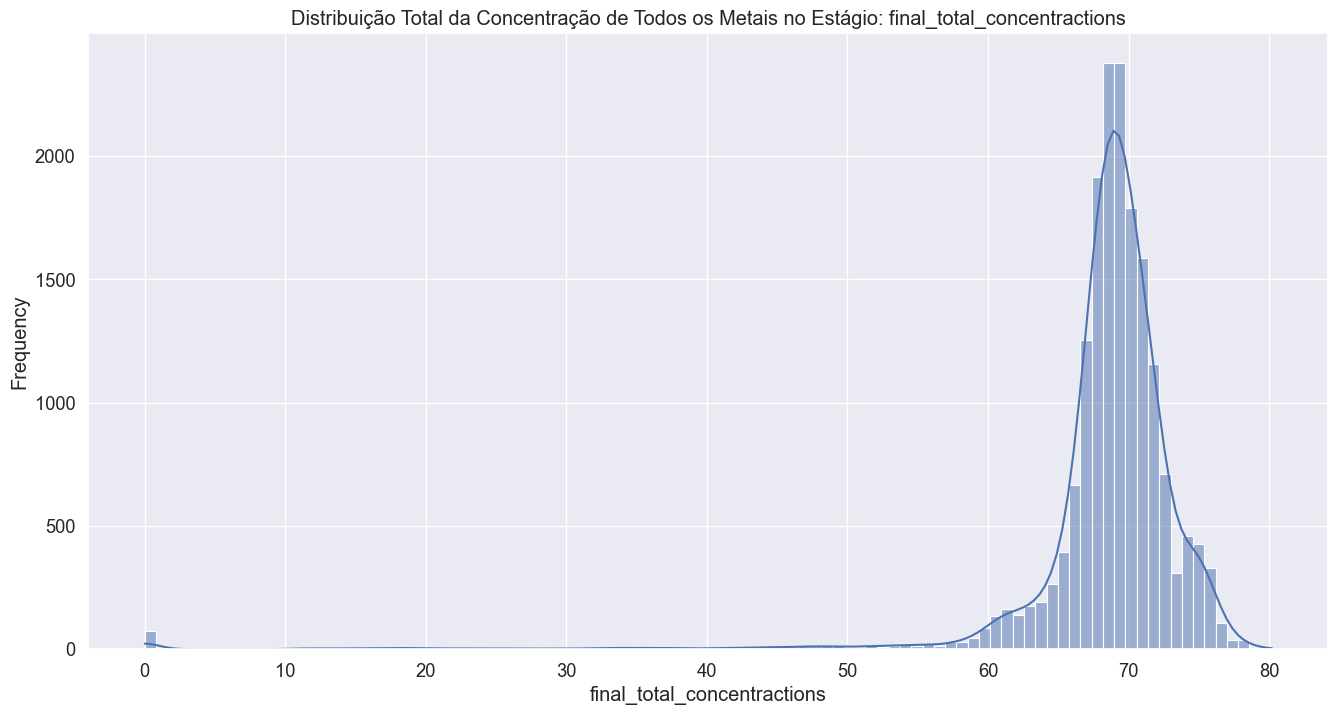

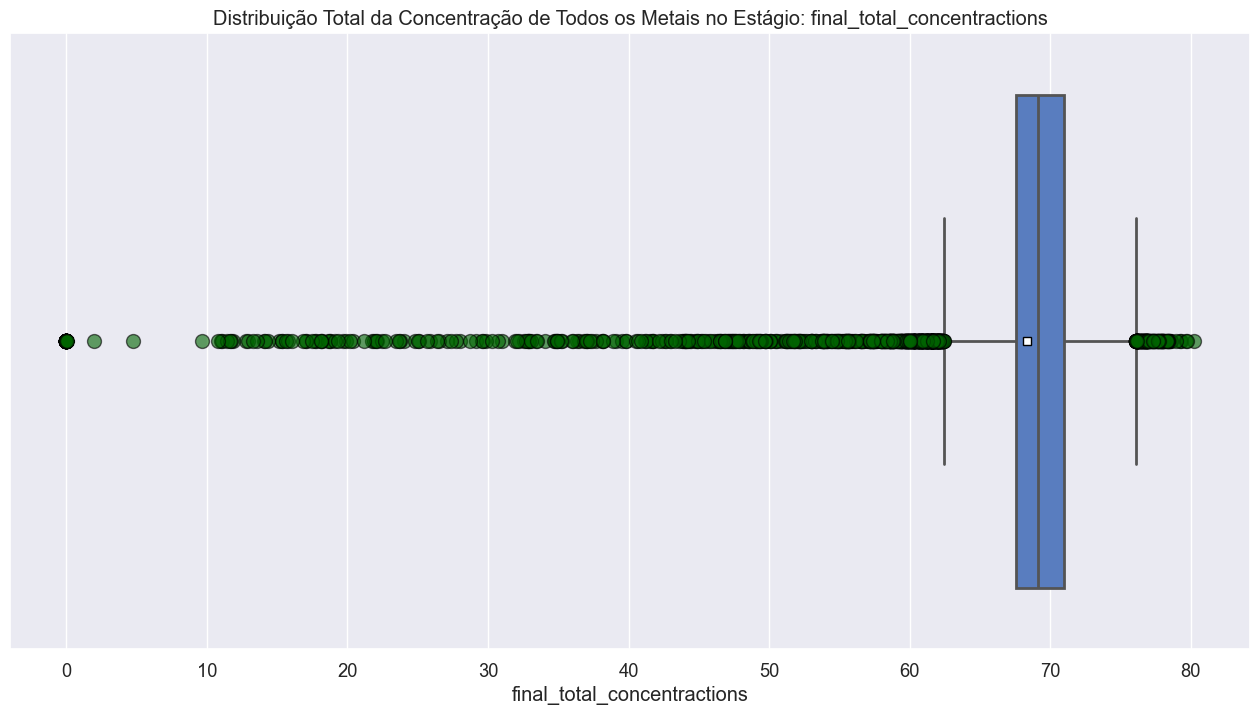

In [42]:
df_train = calc_and_plot_total_concentrations(
    df_train, "final_total_concentractions", feature_final
)

#### Conclusão

**ROUGHER INPUT FEED STAGE**

- As concentrações totais de todas as substâncias no conjunto de origem são inclinadas à esquerda, pois o pico da distribuição está no lado direito e a média é menor que a mediana.

- Existem muitos valores discrepantes, mas há um grande aumento incomum na concentração de todas as substâncias em 0.

- Removeremos todas as observações no conjunto de origem - df_train onde df_train['feed_total_concentractions'] < 0,8


**ROUGHER OUTPUT STAGE**

- As concentrações totais de todas as substâncias no conjunto de origem são inclinadas à esquerda, pois o pico da distribuição está no lado direito e a média é menor que a mediana.

- Existem muitos valores discrepantes, mas há um grande aumento incomum na concentração de todas as substâncias em 0.

- Removeremos todas as observações no conjunto de origem - df_train onde df_train['rougher_output_total_concentractions'] < 0,8


**FINAL OUTPUT STAGE**

- As concentrações totais de todas as substâncias no conjunto de origem são inclinadas à esquerda, pois o pico da distribuição está no lado direito e a média é menor que a mediana.

- Existem muitos valores discrepantes, mas há um grande aumento incomum na concentração de todas as substâncias em 0.

- Removeremos todas as observações no conjunto de origem - df_train onde df_train['final_total_concentractions'] < 0,8

##### 2.3.3 Test Dataset

Como o conjunto de dados de teste - df_test não possui todos os recursos de saída, temos apenas as colunas abaixo que vêm do estágio Raw Feed:

- rougher.input.feed_ag
- rougher.input.feed_pb
- rougher.input.feed_sol
- rougher.input.feed_au

Podemos analisar as concentrações totais de todas as substâncias no conjunto de testes - df_test apenas para o estágio Raw Feed e encontrar e remover as anomalias.

- **ROUGHER INPUT FEED STAGE**

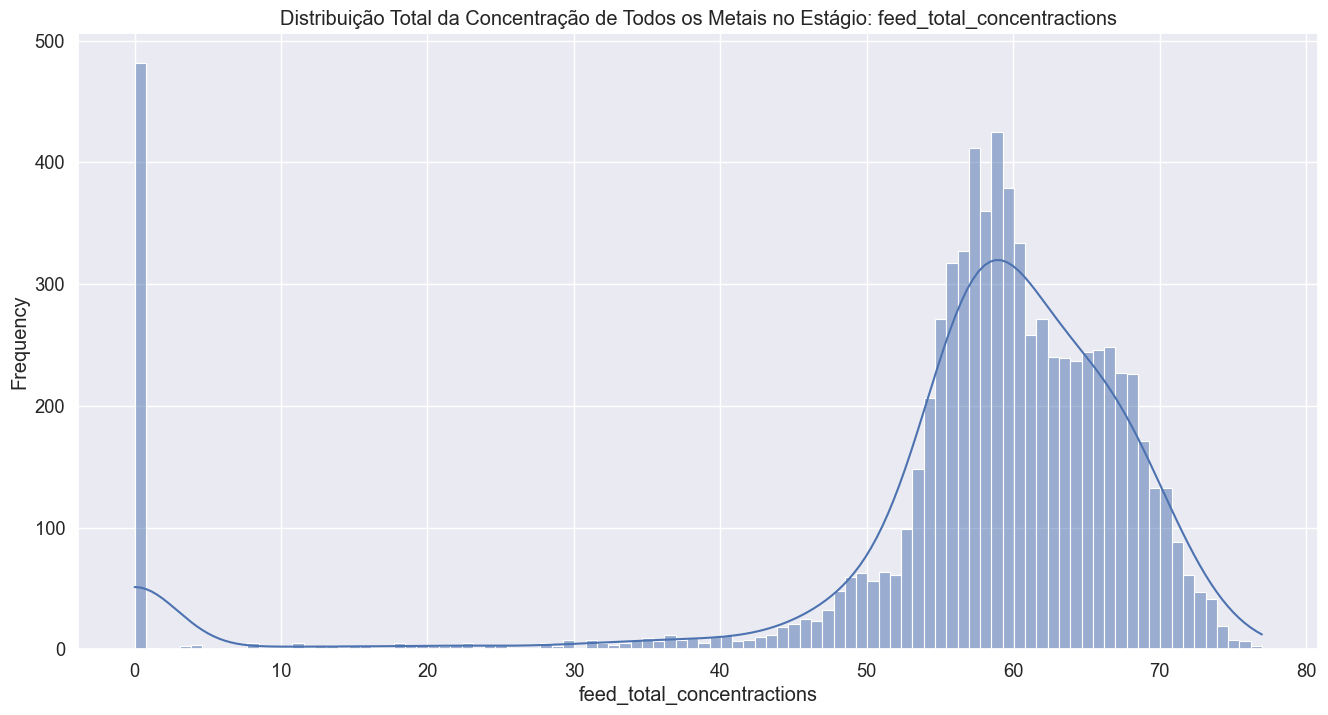

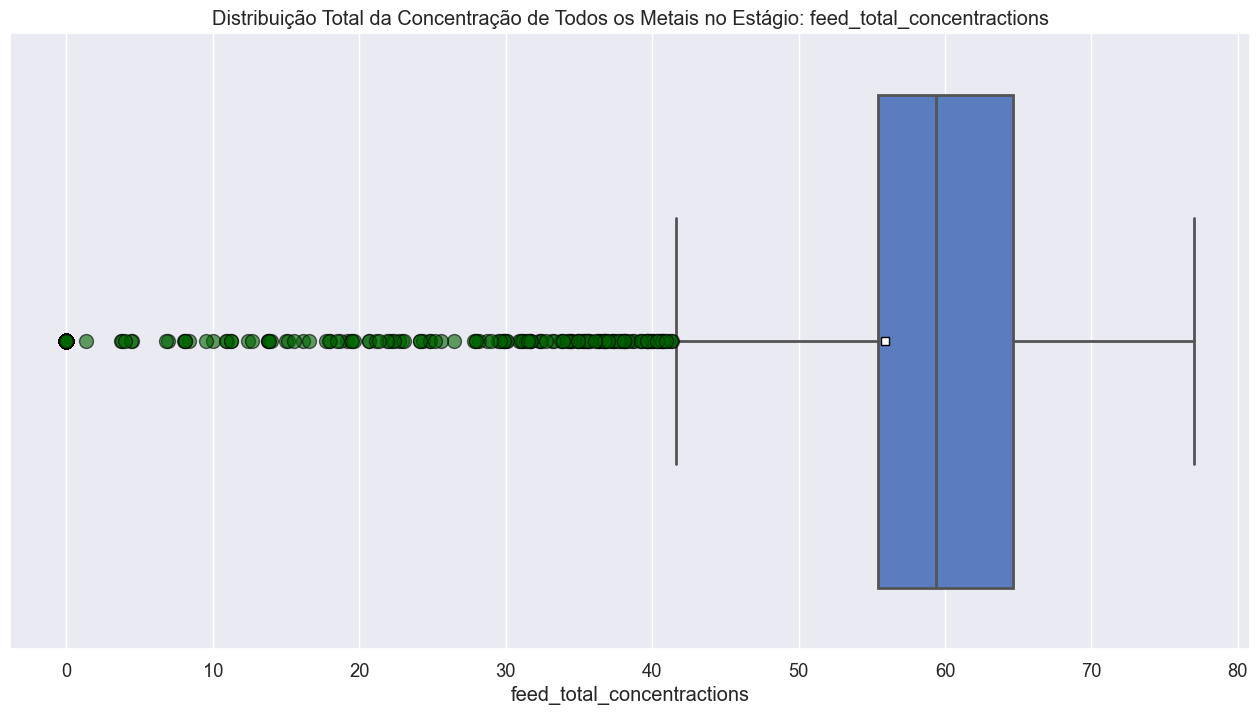

In [43]:
df_test = calc_and_plot_total_concentrations(
    df_test, "feed_total_concentractions", feature_input
)

#### Conclusão

**ROUGHER INPUT FEED STAGE**

- As concentrações totais de todas as substâncias no conjunto de origem são inclinadas à esquerda, pois o pico da distribuição está no lado direito e a média é menor que a mediana.

- Existem muitos valores discrepantes, mas há um grande aumento incomum na concentração de todas as substâncias em 0.

- Removeremos todas as observações no conjunto de origem - df_test onde df_test['feed_total_concentractions'] < 0,8


##### 2.3.4 Removendo Outliers

In [44]:
# Filtrando os datasets com as conclusões encontradas anteriormente
df_full = df_full[
    (df_full["feed_total_concentractions"] >= 0.8)
    & (df_full["rougher_output_total_concentractions"] >= 0.8)
    & (df_full["final_total_concentractions"] >= 0.8)
]

df_train = df_train[
    (df_train["feed_total_concentractions"] >= 0.8)
    & (df_train["rougher_output_total_concentractions"] >= 0.8)
    & (df_train["final_total_concentractions"] >= 0.8)
]

df_test = df_test[df_test["feed_total_concentractions"] >= 0.8]

# Obtendo o shape dos datasets filtrados
df_full.shape, df_train.shape, df_test.shape

((18943, 90), (13789, 90), (5485, 54))

#### 2.4 Preparando os Dados Finais para os Modelos

In [45]:
# Fazendo cópias dos dataframes
new_df_full = df_full.copy()
new_df_train = df_train.copy()
new_df_test = df_test.copy()

In [46]:
# Removendo as colunas criadas na seção anterior no dataframe new_df_train
columns_to_drop = [
    "feed_total_concentractions",
    "rougher_output_total_concentractions",
    "final_total_concentractions",
]
new_df_train = new_df_train.drop(columns_to_drop, axis=1)

# Removendo a coluna criada na seção anterior no dataframe new_df_test
new_df_test = new_df_test.drop(["feed_total_concentractions"], axis=1)

new_df_train.info(), new_df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13789 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                13789 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         13789 non-null  float64       
 2   final.output.concentrate_pb                         13789 non-null  float64       
 3   final.output.concentrate_sol                        13789 non-null  float64       
 4   final.output.concentrate_au                         13789 non-null  float64       
 5   final.output.recovery                               13789 non-null  float64       
 6   final.output.tail_ag                                13789 non-null  float64       
 7   final.output.tail_pb                                13789 non-null  float64       
 8   final.outpu

(None, None)

Agora vamos remover as colunas do dataset de treinamento que não estão presente no dataset de teste. Porém não podemos remover as 2 colunas objetivos, que são: "rougher.output.recovery" e "final.output.recovery"

In [47]:
# Mostrando novamente as colunas faltantes no dataset df_test
missed_columns

['rougher.output.recovery',
 'rougher.output.tail_pb',
 'rougher.output.tail_sol',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_pb',
 'final.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.tail_ag',
 'secondary_cleaner.output.tail_pb',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'secondary_cleaner.output.tail_au',
 'final.output.tail_sol',
 'final.output.concentrate_sol',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'primary_cleaner.output.concentrate_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'final.output.tail_pb',
 'final.output.recovery',
 'rougher.output.concentrate_au',
 'final.output.concentrate_pb',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'final.output.tail_ag',
 'rougher.calculation.au_pb_ratio',
 'secondary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail

In [48]:
# Removendo rougher.output.recovery e final.output.recovery da lista missed_columns
missed_columns.remove("rougher.output.recovery")
missed_columns.remove("final.output.recovery")

In [49]:
# Drop colunas que não estão presentes no dataset df_test
new_df_train = new_df_train.drop(missed_columns, axis=1)

In [50]:
# Listando as colunas do new_df_train
display(new_df_train.columns)

Index(['date', 'final.output.recovery', 'primary_cleaner.input.sulfate',
       'primary_cleaner.input.depressant', 'primary_cleaner.input.feed_size',
       'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.output.recovery',
       'rougher.state.floatbank10_

In [51]:
# new_df_train shape
new_df_train.shape

(13789, 55)

Agora, precisamos obter os valores das variáveis objetivo no conjunto de dados de origem (df_full)

Temos dois alvos: rougher.output.recovery e final.output.recovery. 

Mas, no conjunto de testes (df_test) não possui nenhum deles, pois são colunas relacionadas à saída. Precisaremos de ambos os recursos para fins de validação.

Sabemos que temos dados completos no conjunto de origem (df_full) e temos uma coluna em comum entre o conjunto de dados df_full e df_test, que é a coluna "date". Podemos usá-lo para mesclar os conjuntos de dados e recuperar os valores dos alvos.

In [52]:
# Merge new_df_full e new_df_test pela coluna "date"
df_source_to_merge = new_df_full[
    ["date", "rougher.output.recovery", "final.output.recovery"]
]
df_test_derived = pd.merge(df_source_to_merge, new_df_test, how="inner", on="date")

In [53]:
# df_test_derived shape
df_test_derived.shape

(5154, 55)

In [54]:
# df_test_derived info
df_test_derived.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5154 entries, 0 to 5153
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   date                                        5154 non-null   datetime64[ns]
 1   rougher.output.recovery                     5154 non-null   float64       
 2   final.output.recovery                       5154 non-null   float64       
 3   primary_cleaner.input.sulfate               5154 non-null   float64       
 4   primary_cleaner.input.depressant            5154 non-null   float64       
 5   primary_cleaner.input.feed_size             5154 non-null   float64       
 6   primary_cleaner.input.xanthate              5154 non-null   float64       
 7   primary_cleaner.state.floatbank8_a_air      5154 non-null   float64       
 8   primary_cleaner.state.floatbank8_a_level    5154 non-null   float64       
 9   primary_

Ultima coisa a se fazer, é fazer o drop da coluna "date" do new_df_train e new_df_test, pois não são necessários para o modelo.

In [55]:
# Drop date de  df_test_derived e new_df_train
df_test_derived = df_test_derived.drop(["date"], axis=1)
new_df_train = new_df_train.drop(["date"], axis=1)

df_test_derived.columns, new_df_train.columns

(Index(['rougher.output.recovery', 'final.output.recovery',
        'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
        'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
        'primary_cleaner.state.floatbank8_a_air',
        'primary_cleaner.state.floatbank8_a_level',
        'primary_cleaner.state.floatbank8_b_air',
        'primary_cleaner.state.floatbank8_b_level',
        'primary_cleaner.state.floatbank8_c_air',
        'primary_cleaner.state.floatbank8_c_level',
        'primary_cleaner.state.floatbank8_d_air',
        'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag',
        'rougher.input.feed_pb', 'rougher.input.feed_rate',
        'rougher.input.feed_size', 'rougher.input.feed_sol',
        'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
        'rougher.input.floatbank10_xanthate',
        'rougher.input.floatbank11_sulfate',
        'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank1

## 3. CONSTRUINDO O MODELO

Por conveniência e praticidade, vamos alterar os conjuntos de dados new_df_train e df_test_derived para df_train e df_test, respectivamente

In [56]:
# renomeando os datasets
df_train = new_df_train
df_test = df_test_derived

In [57]:
# Definir as features e target
targets = ["rougher.output.recovery", "final.output.recovery"]

features_train, target_train = df_train.drop(targets, axis=1), df_train[targets]
features_test, target_test = df_test.drop(targets, axis=1), df_test[targets]

In [58]:
# features shape
features_train.shape, features_test.shape

((13789, 52), (5154, 52))

In [59]:
# targets shape
target_train.shape, target_test.shape

((13789, 2), (5154, 2))

Vamos fazer o preprocessamento dos dados

In [60]:
# Utilizando o StandardScale para padronizar os dados
numeric_columns = features_train.select_dtypes(include="number").columns.tolist()

# Criar o pipeline com StandardScaler
numeric_transformer = Pipeline(steps=[("scaler", StandardScaler())])

# Criar o pré-processador para as colunas numéricas
preprocessor = ColumnTransformer(
    transformers=[("num", numeric_transformer, numeric_columns)]
)

# Aplicar o pré-processador aos dados de treino e teste
features_train_processed = preprocessor.fit_transform(features_train)
features_test_processed = preprocessor.transform(features_test)

#### 3.1 Calculo final sMAPE

- Cálculo da função sMAPE:

$$ sMAPE = {1 \over N} \sum_{i=1}^{N} {|y_i - \hat y_i |\over (|y_i| + |\hat y_i|) / 2} * 100\% $$

In [61]:
# função para calcular smape
def calculate_smape(real: pd.Series, prediction: pd.Series):
    """
    Essa função:
     1. Pega a série real de valores alvo para uma coluna e a série prevista de valores para essa coluna
     2. Calcula o sMAPE
     3. Retorna o sMAPE para coluna
    """

    error = np.abs(real - prediction)
    scale = (np.abs(real) + np.abs(prediction)) / 2
    smape = (error / scale).mean() * 100

    return smape

- Cálculo da função Final sMAPE:

$$sMAPE final = 25\% * sMAPE(rougher) + 75\% * sMAPE(final)$$

In [62]:
# Function to final smape evaluation metric


def calculate_final_smape(y_true_rougher, y_pred_rougher, y_true_final, y_pred_final):
    """
    This function:
    1. Pega os valores smapes das variáveis rougher.output.recovery & final.output.recovery
    2. Calcula o final smape
    3. Retorna o final smape
    """
    smape_rougher = calculate_smape(y_true_rougher, y_pred_rougher)
    smape_final = calculate_smape(y_true_final, y_pred_final)
    final_smape = (0.25 * smape_rougher) + (0.75 * smape_final)

    return final_smape

Vamos criar o score da função calculat_smape que foi definida acima

In [63]:
smape_score = make_scorer(calculate_final_smape, greater_is_better=False)

### 3.2 Treinando diferentes modelos

In [64]:
def train_fit_score(model, params, name):
    # Criar o objeto GridSearchCV
    grid_search = GridSearchCV(model, params, scoring=smape_score, cv=5, verbose=0)

    # Ajustar o modelo aos dados de treino
    grid_search.fit(features_train, target_train)

    # Fazer previsões nos dados de teste
    predictions = grid_search.predict(features_test)

    # Calcular métricas de avaliação
    rmse = root_mean_squared_error(target_test, predictions)
    mae = mean_absolute_error(target_test, predictions)

    # Calcular o sMAPE para as colunas rougher.output.recovery e final.output.recovery
    smape_rougher = calculate_smape(
        target_test["rougher.output.recovery"], predictions[:, 0]
    )
    smape_final = calculate_smape(
        target_test["final.output.recovery"], predictions[:, 1]
    )

    # Calcular o sMAPE final usando a função calculate_final_smape
    final_smape = calculate_final_smape(
        target_test["rougher.output.recovery"],
        predictions[:, 0],
        target_test["final.output.recovery"],
        predictions[:, 1],
    )

    # Imprimir os melhores parâmetros encontrados pelo GridSearchCV
    print(f"Melhores Parâmetros para {name}:", grid_search.best_params_)

    # Imprimir as métricas de avaliação
    print(f"Root Mean Squared Error (RMSE) para {name}: {rmse:.4f}")
    print(f"Mean Absolute Error (MAE) para {name}: {mae:.4f}")

    print(f"sMAPE para rougher.output.recovery: {smape_rougher:.4f}")
    print(f"sMAPE para final.output.recovery: {smape_final:.4f}")
    print(f"Final sMAPE: {final_smape:.4f}")

    # Retornar as métricas
    return rmse, mae, final_smape

##### 3.2.1 LinearRegression

In [65]:
%%time
# Definir o modelo
lr_model = LinearRegression()

# Definir a grade de hiperparâmetros para o GridSearchCV
lr_params = {}

# Chamar a função para treinar, ajustar e avaliar o modelo
rmse_LR, mae_LR, final_smape_LR = train_fit_score(
    lr_model, lr_params, "Linear Regression"
)

Melhores Parâmetros para Linear Regression: {}
Root Mean Squared Error (RMSE) para Linear Regression: 6.7349
Mean Absolute Error (MAE) para Linear Regression: 4.8444
sMAPE para rougher.output.recovery: 4.7851
sMAPE para final.output.recovery: 8.5176
Final sMAPE: 7.5845
CPU times: total: 266 ms
Wall time: 237 ms


##### 3.2.2 DecisionTreeRegressor

In [66]:
%%time
# Definir o modelo
dtr_model = DecisionTreeRegressor(random_state=12345)

# Definir a grade de hiperparâmetros para o GridSearchCV
dtr_params = {"max_depth": [None, 5, 10, 15, 20]}

# Chamar a função para treinar, ajustar e avaliar o modelo
rmse_DTR, mae_DTR, final_smape_DTR = train_fit_score(
    dtr_model, dtr_params, "Decision Tree Regressor"
)

Melhores Parâmetros para Decision Tree Regressor: {'max_depth': None}
Root Mean Squared Error (RMSE) para Decision Tree Regressor: 10.9661
Mean Absolute Error (MAE) para Decision Tree Regressor: 8.0370
sMAPE para rougher.output.recovery: 6.5479
sMAPE para final.output.recovery: 16.3779
Final sMAPE: 13.9204
CPU times: total: 7.47 s
Wall time: 14.5 s


##### 3.2.3 RandomForestRegressor

In [67]:
%%time
# Definir o modelo
rf_model = RandomForestRegressor(random_state=12345)

# Definir a grade de hiperparâmetros para o GridSearchCV
rf_params = {
    "n_estimators": [10, 20],
    "max_depth": [None, 5, 10, 15],
}

# Chamar a função para treinar, ajustar e avaliar o modelo
rmse_RFR, mae_RFR, final_smape_RFR = train_fit_score(
    rf_model, rf_params, "Random Forest Regressor"
)

Melhores Parâmetros para Random Forest Regressor: {'max_depth': None, 'n_estimators': 10}
Root Mean Squared Error (RMSE) para Random Forest Regressor: 6.8117
Mean Absolute Error (MAE) para Random Forest Regressor: 5.1081
sMAPE para rougher.output.recovery: 4.9800
sMAPE para final.output.recovery: 9.1040
Final sMAPE: 8.0730
CPU times: total: 2min 3s
Wall time: 3min 5s


## 4. CONCLUSÃO

In [68]:
# Criar um dicionário com os resultados
results = {
    "Model": [
        "Linear Regression",
        "Decision Tree Regressor",
        "Random Forest Regressor",
    ],
    "RMSE": [rmse_LR, rmse_DTR, rmse_RFR],
    "MAE": [mae_LR, mae_DTR, mae_RFR],
    "Final sMAPE": [final_smape_LR, final_smape_DTR, final_smape_RFR],
}

# Criar um DataFrame a partir do dicionário
results_df = pd.DataFrame(results)

# Imprimir a tabela
results_df

,Model,RMSE,MAE,Final sMAPE
0,Linear Regression,6.734879,4.844372,7.584517
1,Decision Tree Regressor,10.966146,8.036983,13.920446
2,Random Forest Regressor,6.811704,5.108131,8.072978



Vamos interpretar os resultados das métricas para cada modelo:

1. Linear Regression:

- RMSE (Root Mean Squared Error): 6.734879
- MAE (Mean Absolute Error): 4.844372
- Final sMAPE: 7.584517

O modelo de Regressão Linear apresenta um desempenho relativamente bom, com valores baixos de RMSE e MAE, indicando que as previsões estão próximas dos valores reais. O valor do Final sMAPE também é baixo, sugerindo que o modelo tem uma boa capacidade de previsão.

2. Decision Tree Regressor:

- RMSE: 10.966146
- MAE: 8.036983
- Final sMAPE: 13.920446

O Decision Tree Regressor apresenta valores mais altos de RMSE, MAE e Final sMAPE em comparação com a Regressão Linear. Isso indica que o modelo de árvore de decisão tem um desempenho inferior na previsão dos dados em comparação com a Regressão Linear.

3. Random Forest Regressor:

- RMSE: 6.811704
- MAE: 5.108131
- Final sMAPE: 8.072978

O Random Forest Regressor apresenta métricas semelhantes à Regressão Linear, indicando um desempenho sólido. O RMSE e o MAE são baixos, sugerindo previsões precisas, e o Final sMAPE também é baixo, indicando uma boa capacidade de generalização.

Conclusões:

- A Regressão Linear e o Random Forest Regressor mostraram desempenhos comparativamente bons.

- O Decision Tree Regressor teve um desempenho inferior em comparação com os outros dois modelos, com valores mais altos de todas as métricas.

- Ao considerar o Final sMAPE, que combina as métricas para ambas as saídas ("rougher.output.recovery" e "final.output.recovery"), o Linear Regression parece ser uma escolha mais sólida.